<a href="https://colab.research.google.com/github/KOYYANAYESUKUMAR/FMML.LABS/blob/main/FMML_M7L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Matrix Factorization (Based on Recommender System Example)

Matrix factorization is a way to generate latent features when multiplying two different kinds of entities. Collaborative filtering is the application of matrix factorization useful to identify the relationship between items’ and users’ entities in a recommender system.

Define a set of Users (U), items (D), R size of |U|, and |D|. The matrix |U|\*|D| includes all the ratings given by users. The goal is to discover K latent features. Given with the input of two matrics matrices P (|U|\*k) and Q (|D|\*k), it would generate the product result R.

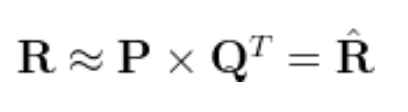

Matrix P represents the association between a user and the features while matrix Q represents the association between an item and the features. We can get the prediction of a rating of an item by the calculation of the dot product of the two vectors corresponding to u_i and d_j.

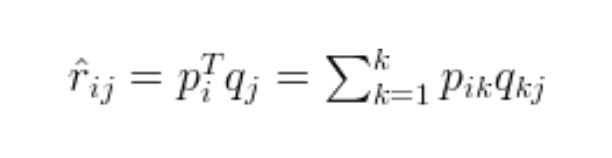

To get two entities of both P and Q, we need to initialize the two matrices and calculate the difference of the product named as matrix M. Next, we minimize the difference through the iterations. The method is called gradient descent, aiming at finding a local minimum of the difference.

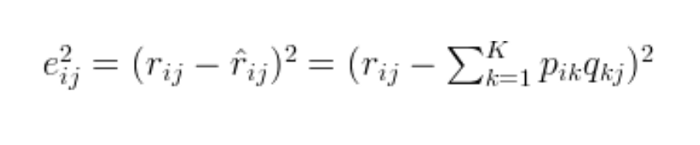

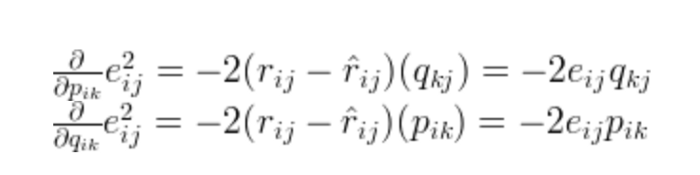

In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:
            break

    return P, Q.T

In [2]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
     [2,1,3,0],
    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3


P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)



nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

The predicted matrix is generated below. As you can see, the predicted matrix has similar output with the true values, and the 0 ratings are replaced with the prediction based on the similar users’ preferences on movies.

In [3]:
print(nR)

[[5.01044475 2.9169799  5.01988549 1.00474908]
 [3.97111358 2.22107791 4.26667195 0.99971185]
 [1.05712731 0.88350875 4.22151074 4.97516489]
 [0.98683622 0.75141819 3.55332626 3.97971978]
 [2.08945262 1.09190354 4.95491763 3.99472355]
 [1.90651847 1.11675597 3.00745433 1.8627059 ]]


## SVD (Continuing the Recommender System Example)

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K < N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

The factorisation of this matrix is done by the singular value decomposition. It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. The singular value decomposition is a method of decomposing a matrix into three other matrices as given below:

image.png

Where A is a m x n utility matrix, U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors, S is a r x r diagonal matrix, which describes the strength of each latent factor and V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors. The latent factors here are the characteristics of the items, for example, the genre of the music. The SVD decreases the dimension of the utility matrix A by extracting its latent factors. It maps each user and each item into a r-dimensional latent space. This mapping facilitates a clear representation of relationships between users and items.

## Working with Text 1 : Bag of Words Model

A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs. Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    A vocabulary of known words.
    A measure of the presence of known words.


Let's try BoW model on an example

The sentences are -

1.   grey is a dull color
2.   orange is a fruit
3.   orange is a colour


In [4]:
sentences = [["grey", "is", "a", "dull", "colour"], ["orange", "is", "a", "fruit"], ["orange", "is", "a", "colour"]]
# Add your sentences here and see the embeddings

# The vocabulary is -
# vocabulary = ["grey", "is", "a", "dull", "colour", "orange", "fruit"]

vocabulary = []
for sentence in sentences:
  for word in sentence:
    if word not in vocabulary:
      vocabulary.append(word)

print(vocabulary)

['grey', 'is', 'a', 'dull', 'colour', 'orange', 'fruit']


Now we need to find which words occur in a given sentence and hence assign each sentence a corresponding vector based upon multiple metrics.

This can be done in a few ways :
1. Boolean count of whether the word occurs in a sentence
2. Counts of each word that occurs in a sentence
3. Frequency of words out of all oher words in a sentence
4. TF-IDF (will be covered in next lab)

In [5]:
# We shall implement point 2 now

bow_sentences = []

for sentence in sentences:
  bow_representation = [0 for i in range(len(vocabulary))]
  for indx, word in enumerate(vocabulary):
    if word in sentence:
      bow_representation[indx]+=1
  bow_sentences.append(bow_representation)

In [6]:
print(bow_sentences)

[[1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 0]]


**You can now try to add your sentences and see how it works!**

## Working with Text 2 : LSI (Latent Semantic Indexing)

Now, we will introduce an indexing and retrieval method: the Latent Semantic Indexing (LSI). It uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in a corpus (unstructured collection of documents).

Latent Semantic Indexing is a common technique in the NLP field. It is used to analyze relationships between a set of documents and the terms they contain in order to produce a set of concepts related to the documents and terms.

LSI is based on the distributional hypothesis which states that words that are close in meaning will occur in similar pieces of text. The starting point is the representation matrix $A$ of the distribution of the words within the set of documents. It is a $m * n$ matrix where $m$ is the number of unique words and $n$ is the corpus cardinality. The element $a_{ij}$ represents the frequency of the word $i$ in the document $j$.

Singular Value Decomposition (SVD) is consequently applied to the matrix A in order to reduce the dimensionality of the data.

The SVD computes the term and document vector spaces by approximating the single term-frequency matrix $A$ as follows:

$$
A \approx TSD^T
$$

where $T$ is the $m * r$ term-concept vector matrix, $S$ is the $r * r$ singular values matrix, $D$ is the $n * r$ concept-document vector matrix, such that

$$
T^{T}T = I_r \\
D^{T}D = I_r \\
S_{11}\ge S_{22}\ge ... \ge S_{rr} \ge 0 \\ S_{ij}=0 \hspace{1cm} \forall i \ne j
$$

The next step is to truncate the SVD and keep only the largest $k$ << $r$ diagonal entries in the singular value matrix $S$, where $k$ is typically on the order 100 to 300 dimensions. This effectively reduces the term matrix $T$ size to $m * k$ and the document matrix $D$ size to $n * k$.

Let us now get started with the code! Note that we will use a library **gensim**, which does most of the hard work for us.

In [7]:
# Install requires lirbaries

!pip install --upgrade gensim
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents

In [8]:
# !curl -L -o 'movies.csv' 'https://drive.google.com/uc?export=download&id=1F9l2PUvLtmd75_VFrqNnH-x_AR7zIhQW'

!curl -L -o 'wiki_movies_plots_deduped.csv' 'https://drive.usercontent.google.com/u/0/uc?id=12k4ltUwdhg525XW4dT6hgW18t_Fil3Hj&export=download'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77.4M  100 77.4M    0     0  3953k      0  0:00:20  0:00:20 --:--:-- 20.0M


In [9]:
df = pd.read_csv('wiki_movies_plots_deduped.csv', sep=',', usecols = ['Release Year', 'Title', 'Plot'])
df = df[df['Release Year'] >= 2000] # Use a subset of the data
text_corpus = df['Plot'].values # Get the movie plots

In [10]:
print(text_corpus)

["After three years in prison, Cruella de Vil has been cured of her desire for fur coats by Dr. Pavlov and is released into the custody of the probation office on the provision that she will be forced to pay the remainder of her fortune (eight million pounds) to all the dog shelters in the borough of Westminster should she repeat her crime. Cruella therefore mends her working relationship with her valet Alonzo and has him lock away all her fur coats. Cruella's probation officer, Chloe Simon, nevertheless suspects her, partly because Chloe is the owner of the now-adult Dipstick (one of the original 15 puppies from the previous film) who moved from Roger and Anita's house to her house.\r\nDipstick's mate, Dottie, has recently given birth to three puppies: Domino, Little Dipper and Oddball (who lacks spots). To mend her reputation, Cruella buys the Second Chance Dog shelter, owned by Kevin Shepherd, to resolve its financial insolvency that is on the verge of eviction. Meanwhile, Dr. Pavlo

In [11]:
processed_corpus = preprocess_documents(text_corpus) # Preprocess the text
dictionary = gensim.corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus] # Find the BoW representations

In [16]:
tfidf = gensim.models.TfidfModel(bow_corpus, smartirs='npu') # Perform TF-IDF to get the matrix
corpus_tfidf = tfidf[bow_corpus]

In [15]:
lsi = gensim.models.LsiModel(corpus_tfidf, num_topics=1000) # Perform LSI
index = gensim.similarities.MatrixSimilarity(lsi[corpus_tfidf])

In [17]:
new_doc = "In the arcade at night the video game characters leave their games. The protagonist is a girl from a candy racing game who glitches"
# new_doc = "Boy studies ballet in secret. His father wants him to go to the gym and boxe. They raise money for audition in London"

new_doc = gensim.parsing.preprocessing.preprocess_string(new_doc)
new_vec = dictionary.doc2bow(new_doc)
vec_bow_tfidf = tfidf[new_vec]
vec_lsi = lsi[vec_bow_tfidf]
sims = index[vec_lsi]
for s in sorted(enumerate(sims), key=lambda item: -item[1])[:10]:
    print(f"{df['Title'].iloc[s[0]]} : {str(s[1])}")

Overlord: The Undead King : 0.78072226
Overlord: The Dark Warrior : 0.78072226
Candlestick : 0.7804105
Wreck-It Ralph : 0.6970296
Kami-sama no Iu Toori : 0.67802715
Inferno : 0.67426544
Sex Competition : 0.65681815
 Facing the Giants : 0.5978243
Glory Road : 0.59316206
Sleuth : 0.5788975


As you can see we give the description of the movie "Wreck-it Ralph" and it appears as the third recommended. We are doing a great job with LSI!

Feel free to change the description and see what movies you get :)

## Points to think about

1. How exactly does matrix factorization help us in the recommendation procedure? Why can we not simply model the user-movie matrix?

2. What do the rows of the matrix $T$ represent? (Definition of $T$ is above in the introduction to LSI).

**1**.To experiment with different modes of "bag of words" and explore various plots, we can follow a few steps to evaluate the effectiveness of these models.

First, I would need to know what data or dataset you're working with, and then we can start with some common Bag of Words techniques (like unigrams, bigrams, TF-IDF, etc.) and visualize the results in various ways, such as:

Word Frequency Plots: Bar charts of the most common words.
Word Cloud: A visual representation of word frequency.
Accuracy/Score Plots: Evaluation results like accuracy, precision, recall, etc., for different models.
Confusion Matrix: To visualize the classification performance.
Could you provide more context or share the dataset you're using? If you'd like to work with a specific model (e.g., Naive Bayes, SVM, etc.), let me know that too, and we can go from there.


You said:
How exactly does matrix factorization help us in the recommendation procedure? Why can we not simply model the user-movie matrix?

What do the rows of the matrix  T  represent? (Definition of  T  is above in the introduction to LSI).
ChatGPT said:
Matrix Factorization in Recommendation Systems
Matrix factorization is a powerful technique for recommendation systems, particularly when working with large, sparse datasets such as user-item interaction matrices (like user-movie ratings). Here's how it helps and why it's preferable over directly modeling the user-item matrix:

Why Not Model the User-Movie Matrix Directly?
The user-item matrix (or user-movie matrix in this case) is often sparse, meaning most of the matrix values are unknown (unrated movies by users). This sparsity makes it difficult for traditional methods (like nearest neighbor-based approaches) to perform well, especially as the dataset grows. If we attempt to model this matrix directly:

Sparsity Problem: We are left with a lot of missing values (because users haven't rated all movies), and directly learning the relationship between these sparse entries is challenging.
High Dimensionality: The user-item matrix is often large, with thousands (or millions) of users and items. Directly trying to model it with a large number of parameters can lead to overfitting, as there might not be enough information to accurately estimate the preferences for all combinations of users and items.
Computational Complexity: Storing and processing such a large matrix is computationally expensive, and as the matrix grows, it becomes impractical to handle.
Matrix factorization, particularly techniques like Singular Value Decomposition (SVD), Non-negative Matrix Factorization (NMF), and Latent Semantic Indexing (LSI), helps by breaking down the large, sparse matrix into lower-dimensional matrices that capture the underlying structure of user preferences and item characteristics.

Matrix Factorization Explained
In matrix factorization, the goal is to approximate the original user-item matrix R (of size m x n, where m is the number of users and n is the number of items) into two smaller matrices:

A user matrix
𝑈
U (size m x k)
An item matrix
𝑉
V (size k x n)
Where k is the number of latent factors or dimensions, which is much smaller than the number of users and items.

The factorization approximates the original matrix as:

𝑅
≈
𝑈
×
𝑉
𝑇
R≈U×V
T

This allows us to capture the relationships between users and items in a lower-dimensional space, with the latent factors representing underlying characteristics (e.g., genres, themes, or user preferences).

Why Matrix Factorization Helps:
Capturing Latent Features: The latent factors in the factorized matrices represent hidden structures that explain user preferences. For example, in movie recommendations, these factors might represent preferences like "action movies," "romantic comedies," or "adventure movies" that users gravitate towards, even if they never explicitly rated those genres.

Handling Sparsity: By focusing on lower-dimensional representations, matrix factorization can still produce meaningful predictions even for the missing values in the original matrix.

Reducing Dimensionality: Instead of directly working with a high-dimensional sparse matrix, matrix factorization reduces the data into a manageable size that still captures the essential relationships between users and items.






**2**.Latent Semantic Indexing (LSI) is a specific technique for matrix factorization used primarily in text analysis, such as document retrieval or recommendation based on content. In the context of LSI, the goal is to decompose a term-document matrix (like a user-item interaction matrix but for text data) to reveal the hidden semantic structure.

In LSI, we factorize the term-document matrix
𝐴
A into three matrices:

𝐴
≈
𝑈
Σ
𝑉
𝑇
A≈UΣV
T

𝑈
U: The matrix representing the relationships between terms and latent concepts.
Σ
Σ: A diagonal matrix with singular values representing the importance of each latent concept.
𝑉
V: The matrix representing the relationships between documents and latent concepts.
In the context of LSI:

The rows of the matrix
𝑇
T (which is equivalent to the matrix
𝑉
V in LSI) represent latent semantic concepts (or "topics") that are learned through the factorization process.
Each row corresponds to a particular latent topic, which can be viewed as a vector in the latent semantic space. These topics are not explicitly labeled but represent underlying patterns in the data, like clusters of terms or documents that are semantically related.
In Summary:
Matrix Factorization helps recommendation systems by reducing the dimensionality of the user-item matrix, capturing latent factors that explain user preferences and item characteristics, and handling sparsity and computational challenges.
In LSI, the rows of the matrix
𝑇
T (or
𝑉
V) represent the latent semantic factors or topics that are learned from the term-document matrix, capturing underlying patterns in the data that are not immediately visible.

## Resources and References

1. https://medium.com/betacom/latent-semantic-indexing-in-python-85880414b4de
2. https://www.analyticssteps.com/blogs/introduction-latent-semantic-analysis-lsa-and-latent-dirichlet-allocation-lda
3. https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b
4. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
5. https://machinelearningmastery.com/gentle-introduction-bag-words-model/

# Exercise
* Try out different modes of bag of words
* Experiment with different plots from the sheet and check the scores



Unigram Features:
    amazing  awesome  bad  classic  disliked  fantastic  film  great  hated  \
0        0        0    0        0         0          0     0      1      0   
1        0        0    0        0         0          0     0      0      0   
2        0        0    1        0         0          0     0      0      0   
3        0        0    0        0         0          0     0      0      1   
4        1        0    0        0         0          0     1      0      0   
5        0        1    0        0         0          0     0      0      0   
6        0        0    0        0         1          0     1      0      0   
7        0        0    0        0         0          1     0      0      0   
8        0        0    0        1         0          0     0      0      0   
9        0        0    0        0         0          0     0      1      0   

   is  it  liked  loved  movie  really  the  this  was  
0   0   0      0      0      1       0    1     0    1  
1   0  

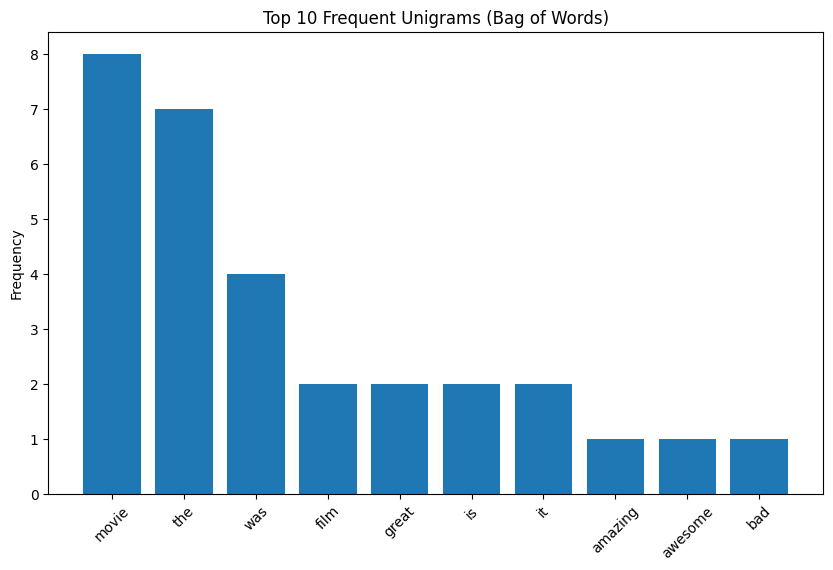

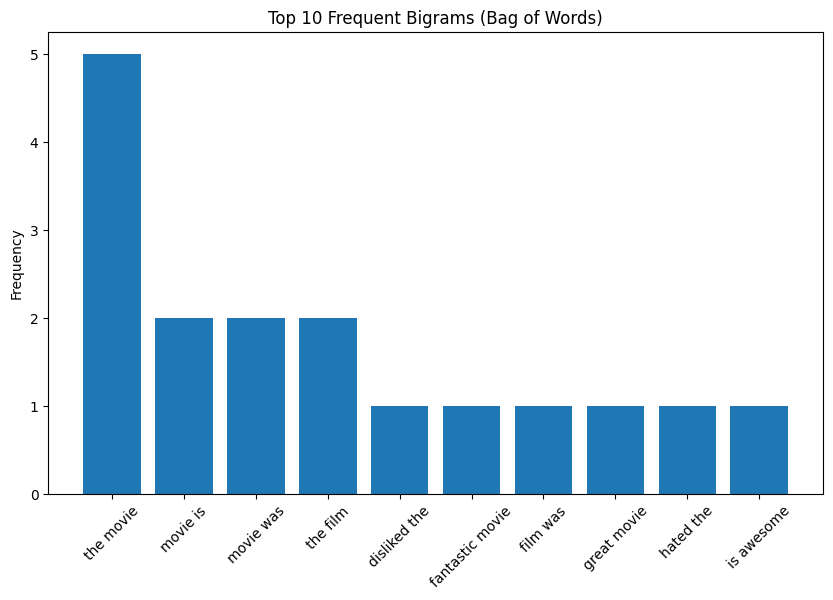

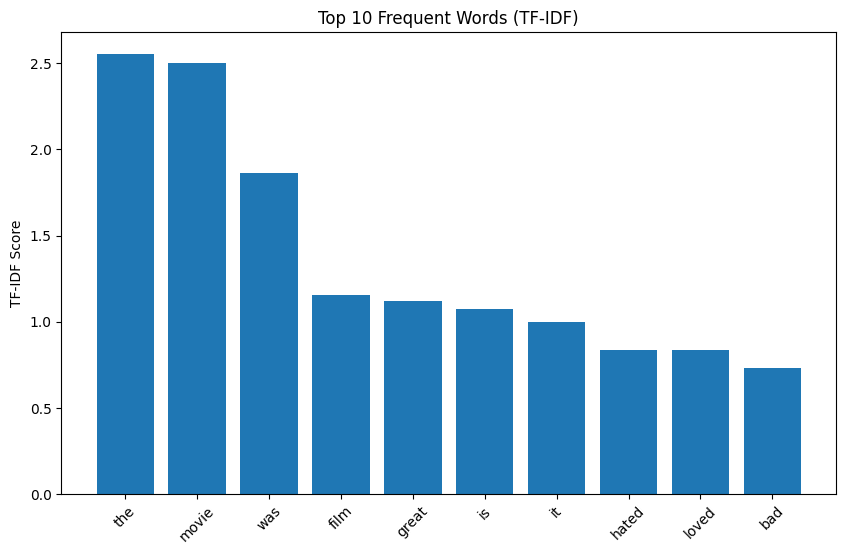

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Sample text data
documents = [
    "The movie was great",
    "I loved the movie",
    "The movie was bad",
    "I hated the movie",
    "The film was amazing",
    "This movie is awesome",
    "I disliked the film",
    "It was a fantastic movie",
    "The movie is a classic",
    "Great movie, I really liked it"
]

# 1. Unigram Model (Simple Bag of Words)
vectorizer_unigram = CountVectorizer()
X_unigram = vectorizer_unigram.fit_transform(documents)

# 2. Bigram Model (Bag of Words with consecutive word pairs)
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_bigram = vectorizer_bigram.fit_transform(documents)

# 3. TF-IDF Model (Term Frequency-Inverse Document Frequency)
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)

# Displaying features for each model
unigram_features = vectorizer_unigram.get_feature_names_out()
bigram_features = vectorizer_bigram.get_feature_names_out()
tfidf_features = vectorizer_tfidf.get_feature_names_out()

# Convert the feature matrices to DataFrame for better visualization
df_unigram = pd.DataFrame(X_unigram.toarray(), columns=unigram_features)
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_features)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_features)

# Show top words for each model
print("\nUnigram Features:\n", df_unigram)
print("\nBigram Features:\n", df_bigram)
print("\nTF-IDF Features:\n", df_tfidf)

# 4. Visualize the top frequent words from the Unigram Model
unigram_word_counts = np.asarray(X_unigram.sum(axis=0)).flatten()
word_freq_unigram = dict(zip(unigram_features, unigram_word_counts))

# Sort words by frequency
sorted_unigram_words = sorted(word_freq_unigram.items(), key=lambda x: x[1], reverse=True)

# Plot top 10 unigram words
top_n = 10
top_unigram_words = dict(sorted_unigram_words[:top_n])

plt.figure(figsize=(10, 6))
plt.bar(top_unigram_words.keys(), top_unigram_words.values())
plt.title('Top 10 Frequent Unigrams (Bag of Words)')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# 5. Visualize the top frequent bigrams
bigram_word_counts = np.asarray(X_bigram.sum(axis=0)).flatten()
word_freq_bigram = dict(zip(bigram_features, bigram_word_counts))

# Sort words by frequency
sorted_bigram_words = sorted(word_freq_bigram.items(), key=lambda x: x[1], reverse=True)

# Plot top 10 bigrams
top_bigram_words = dict(sorted_bigram_words[:top_n])

plt.figure(figsize=(10, 6))
plt.bar(top_bigram_words.keys(), top_bigram_words.values())
plt.title('Top 10 Frequent Bigrams (Bag of Words)')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# 6. Visualize the top TF-IDF scores (most important words across documents)
tfidf_word_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
word_freq_tfidf = dict(zip(tfidf_features, tfidf_word_scores))

# Sort words by importance (TF-IDF score)
sorted_tfidf_words = sorted(word_freq_tfidf.items(), key=lambda x: x[1], reverse=True)

# Plot top 10 TF-IDF words
top_tfidf_words = dict(sorted_tfidf_words[:top_n])

plt.figure(figsize=(10, 6))
plt.bar(top_tfidf_words.keys(), top_tfidf_words.values())
plt.title('Top 10 Frequent Words (TF-IDF)')
plt.xticks(rotation=45)
plt.ylabel('TF-IDF Score')
plt.show()


Accuracy: 0.3333

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


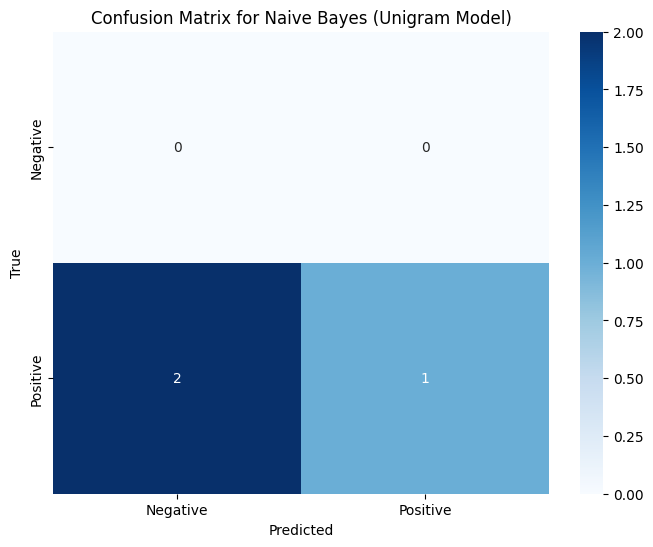

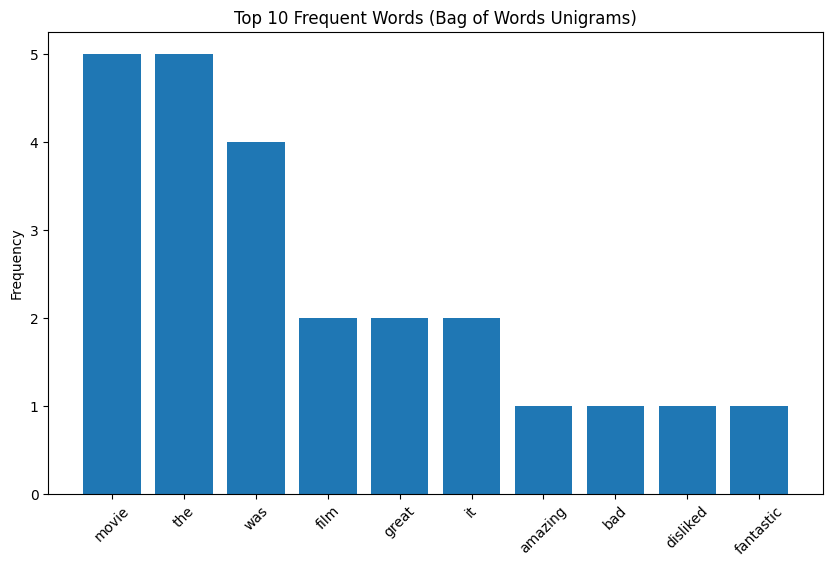

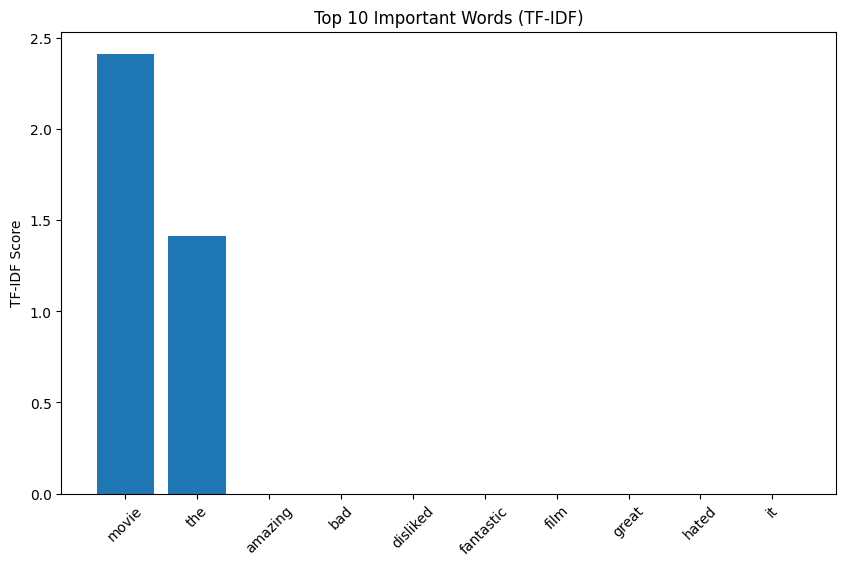


Topic #1:
the film was disliked amazing hated bad movie great fantastic

Topic #2:
movie was the it great really liked fantastic bad hated


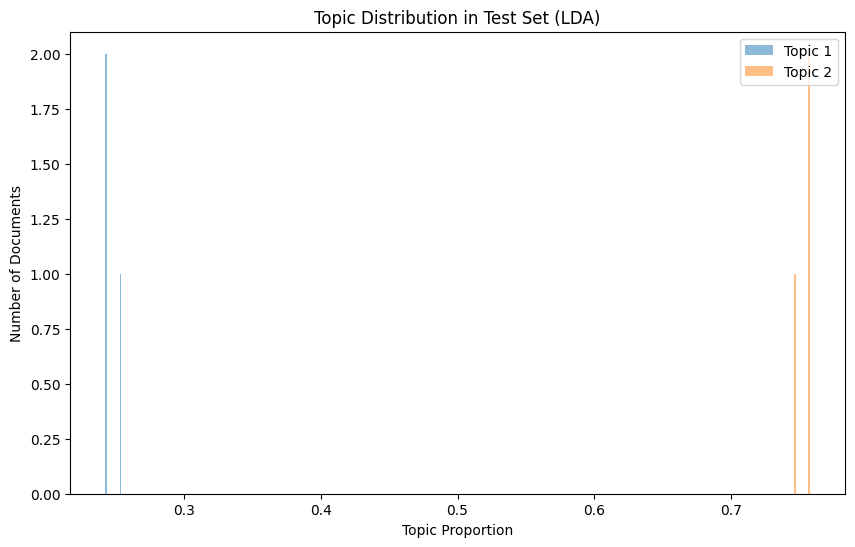

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

# Sample text data
documents = [
    "The movie was great",
    "I loved the movie",
    "The movie was bad",
    "I hated the movie",
    "The film was amazing",
    "This movie is awesome",
    "I disliked the film",
    "It was a fantastic movie",
    "The movie is a classic",
    "Great movie, I really liked it"
]
# Sample labels (for classification task, e.g., Positive/Negative)
labels = ["Positive", "Positive", "Negative", "Negative", "Positive", "Positive", "Negative", "Positive", "Positive", "Positive"]

# Split into train/test data
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

# 1. Bag of Words (Unigram Model)
vectorizer_unigram = CountVectorizer()
X_train_unigram = vectorizer_unigram.fit_transform(X_train)
X_test_unigram = vectorizer_unigram.transform(X_test)

# 2. TF-IDF Model
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# 3. Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_unigram, y_train)

# Predicting on the test set
y_pred = nb.predict(X_test_unigram)

# 4. Evaluation: Accuracy & Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for Naive Bayes (Unigram Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 5. Word Frequency Plot (from the Unigram model)
word_counts = np.asarray(X_train_unigram.sum(axis=0)).flatten()
word_freq = dict(zip(vectorizer_unigram.get_feature_names_out(), word_counts))

# Sort and plot top 10 frequent words
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_words = dict(sorted_words[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 10 Frequent Words (Bag of Words Unigrams)')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# 6. TF-IDF Word Importance Plot (for test set)
tfidf_word_scores = np.asarray(X_test_tfidf.sum(axis=0)).flatten()
tfidf_word_freq = dict(zip(vectorizer_tfidf.get_feature_names_out(), tfidf_word_scores))

# Sort and plot top 10 TF-IDF words
sorted_tfidf_words = sorted(tfidf_word_freq.items(), key=lambda x: x[1], reverse=True)
top_tfidf_words = dict(sorted_tfidf_words[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_tfidf_words.keys(), top_tfidf_words.values())
plt.title('Top 10 Important Words (TF-IDF)')
plt.xticks(rotation=45)
plt.ylabel('TF-IDF Score')
plt.show()

# 7. Latent Dirichlet Allocation (LDA) for Topic Modeling
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X_train_unigram)

# Visualize the top words for each topic
n_top_words = 10
feature_names = vectorizer_unigram.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Visualize topic distributions (just as a simple bar plot example)
topic_dist = lda.transform(X_test_unigram)
topic_1_dist = topic_dist[:, 0]
topic_2_dist = topic_dist[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(topic_1_dist, bins=10, alpha=0.5, label='Topic 1')
plt.hist(topic_2_dist, bins=10, alpha=0.5, label='Topic 2')
plt.title('Topic Distribution in Test Set (LDA)')
plt.legend(loc='upper right')
plt.xlabel('Topic Proportion')
plt.ylabel('Number of Documents')
plt.show()
